In [8]:
from tensorflow.keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Input, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import Conv2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

In [46]:
from tqdm.notebook import tqdm

In [2]:
def loadPickleData(file):
    data = pickle.load(open(file, 'rb'));
    images = data[0];
    labels = data[1];
    return [images, labels]

In [4]:
[images,labels] = loadPickleData("./../Data/pickledFiles/Num_DoubleDigit_3channel.p")

In [5]:
images.shape

(2000, 60, 80, 3)

In [6]:
imgWidth = 40

In [29]:
img = images[0:1, :, :40, :]

In [30]:
img.shape

(1, 60, 40, 3)

TypeError: Invalid shape (1, 60, 40, 3) for image data

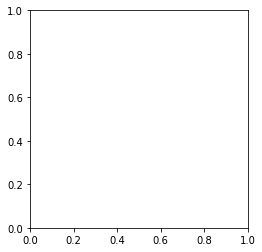

In [31]:
plt.imshow(img)

In [12]:
model = applications.VGG19(weights = "imagenet", include_top=False,\
                           input_shape = (60, 40, 3))
inputt = Input(shape =  (60,40,3), name = 'captcha_input')
output_vgg16_conv = model(inputt)
x = Flatten(name='flatten')(output_vgg16_conv)
predictions = Dense(10, activation="softmax")(x)
model_final = Model(inputt,predictions)
model_final.compile(loss = "categorical_crossentropy",\
                    optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

In [21]:
model = tf.keras.models.load_model('./../SingleLetter/singleCharAcc1.h5')

In [34]:
np.argmax(model.predict(img))

3

In [36]:
[images,labels] = loadPickleData("./../Data/pickledFiles/Num_SingleDigit_3channel.p")

In [37]:
preds = model.predict(images)

In [41]:
finalPreds = np.argmax(preds, axis=1)

In [44]:
np.sum(finalPreds == labels)/len(labels)

0.6265

In [45]:
[images,labels] = loadPickleData("./../Data/pickledFiles/Num_DoubleDigit_3channel.p")

In [49]:
finalPreds = []
for i in tqdm(range(images.shape[0])):
    preds = []
    for j in range(2):
        img = images[i:i+1, :, 40*j:40*(j+1), :]
        val = np.argmax(model.predict(img))
        preds.append(str(val))
    res = int("".join(preds))
    finalPreds.append(res)

  0%|          | 0/2000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [61]:
finalPreds = []
for i in tqdm(range(images.shape[0])):
    preds = []
    for j in range(2):
        img = images[i:i+1, :, 40*j:40*(j+1), :]
        val = np.argmax(model.predict(img))
        preds.append(str(val))
    res = int("".join(preds))
    finalPreds.append(res)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [63]:
np.sum(finalPreds == labels)/len(labels)

0.105

In [54]:
finalPreds = []
preds = []
for j in range(2):
    img = images[:, :, 40*j:40*(j+1), :]
    val = np.argmax(model.predict(img), axis=1)
    preds.append(str(val))
res = int("".join(preds))
finalPreds.append(res)

ValueError: invalid literal for int() with base 10: '[3 3 7 ... 7 5 8][8 7 3 ... 5 4 2]'

In [60]:
len(preds[1])

17